In [42]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from scipy.integrate import simps
import matplotlib
from IPython.display import display, HTML
from matplotlib.patches import Rectangle
%matplotlib inline  
matplotlib.rcParams['figure.figsize'] = [10., 5.]
matplotlib.rcParams["font.size"] = "16"
matplotlib.rcParams["lines.linewidth"] = "3"
matplotlib.rcParams["axes.grid"] = True

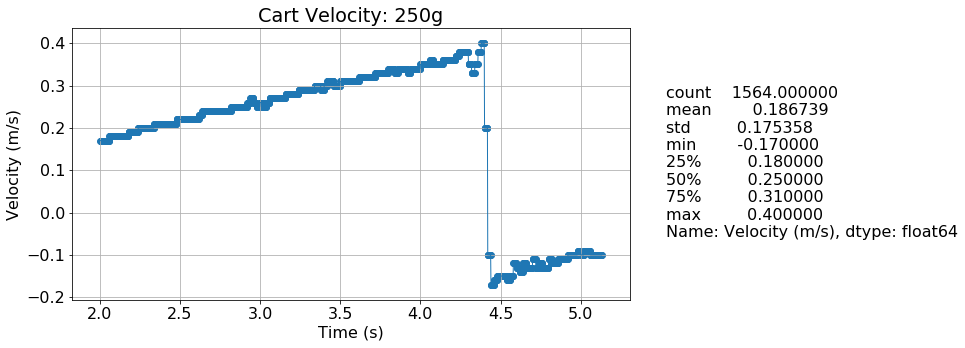

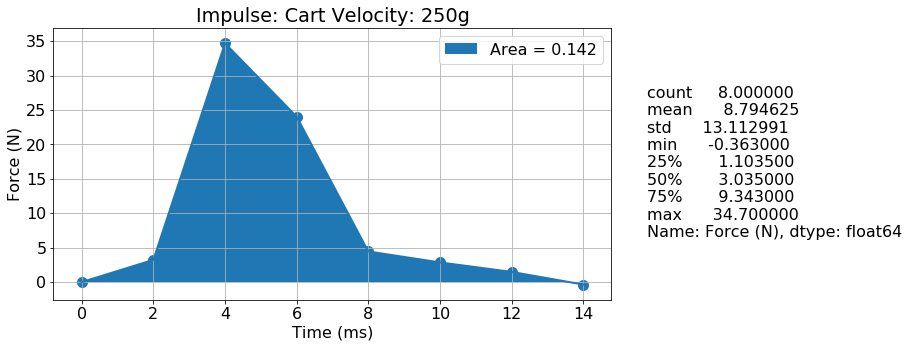

                               0
mass (kg)               0.250000
velocity_initial (m/s)  0.400000
velocity_final (m/s)   -0.170000
momentum_initial        0.100000
momentum_final         -0.042500
delta_p                -0.142500
impulse_duration        0.014000
impulse_integration     0.141925


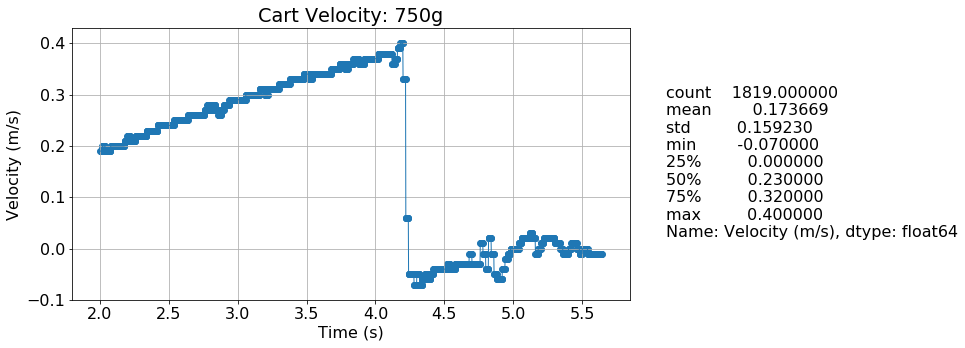

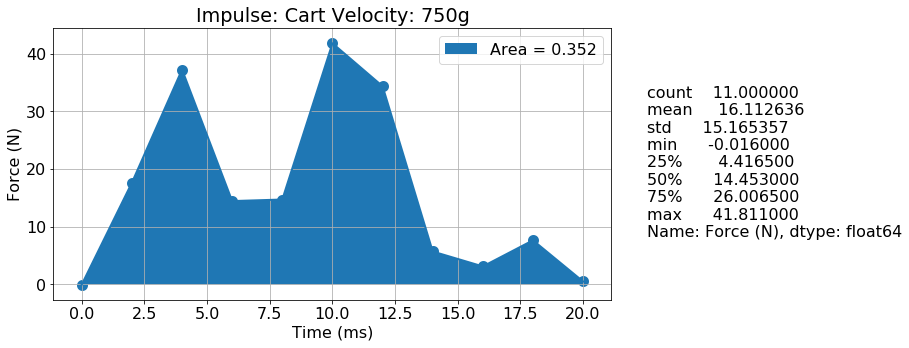

                               0
mass (kg)               0.750000
velocity_initial (m/s)  0.400000
velocity_final (m/s)   -0.070000
momentum_initial        0.300000
momentum_final         -0.052500
delta_p                -0.352500
impulse_duration        0.020000
impulse_integration     0.352353


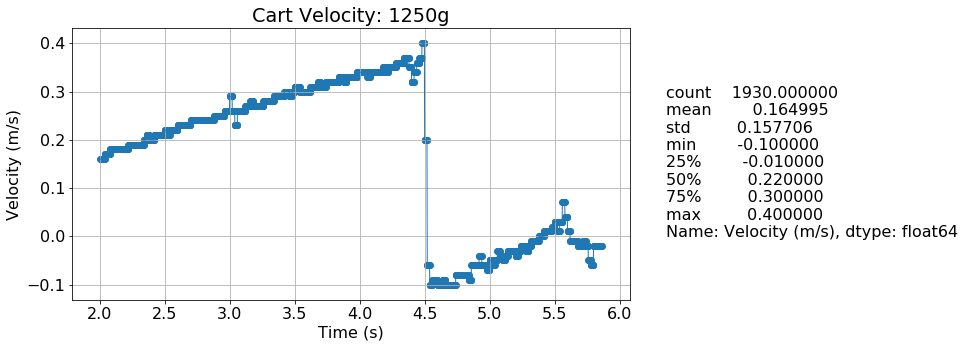

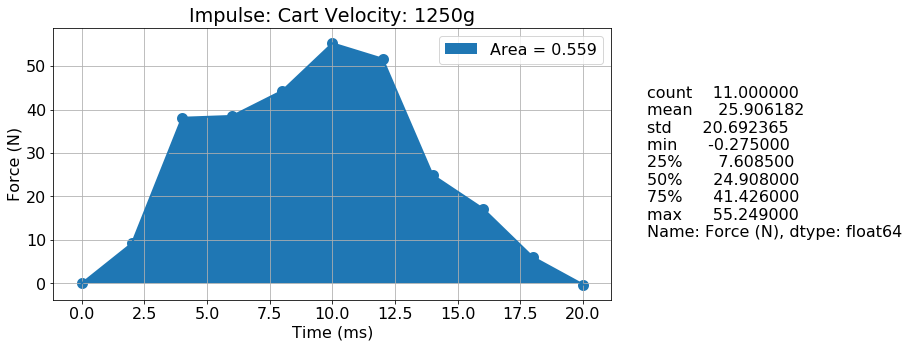

                              0
mass (kg)               1.25000
velocity_initial (m/s)  0.40000
velocity_final (m/s)   -0.10000
momentum_initial        0.50000
momentum_final         -0.12500
delta_p                -0.62500
impulse_duration        0.02000
impulse_integration     0.55868


In [101]:
def lab(df, title, mass):
    
    results = {}
    results['mass (kg)'] = mass
    
    # Filter data
    val = None
    first_val = None
    for s_idx, s in enumerate(df['Velocity (m/s)']):
        if not np.isnan(s):
            val = s
            if first_val is None:
                first_val = s_idx
        elif val is not None:
            df['Velocity (m/s)'][s_idx] = val
    
    # Trim
    df = df[1002:]
    
    plt.plot(df['Time (s)'], df['Velocity (m/s)'], lw=1)
    plt.scatter(df['Time (s)'], df['Velocity (m/s)'])
    plt.ylabel('Velocity (m/s)')
    plt.xlabel('Time (s)')
    title = 'Cart Velocity: %s' % (title)
    plt.figtext(0.95, 0.3, df['Velocity (m/s)'].describe())
    plt.title(title)
    plt.savefig(title)
    plt.show()

    # Calculate Initial and final momentum
    momentum_max_initial = df['Velocity (m/s)'].max() * mass
    momentum_max_final = df['Velocity (m/s)'].min() * mass
    
    results['velocity_initial (m/s)'] = df['Velocity (m/s)'].max()
    results['velocity_final (m/s)'] = df['Velocity (m/s)'].min()
    results['momentum_initial'] = momentum_max_initial
    results['momentum_final'] = momentum_max_final
    
    delta_p = momentum_max_final - momentum_max_initial
    results['delta_p'] = delta_p
    
    # Find Impulse
    impulse_start = None
    impulse_end = None
    
    index_variance = 1
    
    for s_idx, s in enumerate(df['Force (N)']):
        if s > 1.:
            if impulse_start is None:
                impulse_start = s_idx - index_variance
        else:
            if impulse_start is not None and impulse_end is None:
                impulse_end = s_idx + index_variance
                
    # Trim and offset the data to zero
    df = df[impulse_start:impulse_end]
    df['Time (s)'] -= df['Time (s)'].min()
    
    impulse_duration = df['Time (s)'].max() - df['Time (s)'].min()
    results['impulse_duration'] = impulse_duration
    
    color_border = '#1f77b4'
    color_fill = '#1f77b4'
    
    # Integrate 
    impulse = simps(df['Force (N)'], df['Time (s)'])
    results['impulse_integration'] = impulse
          
    # Plot force vs time
    plt.plot(df['Time (s)']*1000, df['Force (N)'], lw=2, color=color_border)

    plt.fill_between(df['Time (s)']*1000, df['Force (N)'], facecolor=color_fill)
    plt.scatter(df['Time (s)']*1000, df['Force (N)'], color=color_border, linewidths=5)

    p1 = Rectangle((0, 0), 1, 1, fc=color_fill)
    plt.legend([p1], ['Area = %.3f' % impulse])
    
    plt.figtext(0.95, 0.3, df['Force (N)'].describe())

    
    plt.ylabel('Force (N)')
    plt.xlabel('Time (ms)')
    title = 'Impulse: %s' % (title)
    plt.title(title)
    plt.savefig(title)
    plt.show()
    
    return pd.DataFrame.from_dict(results, orient='index')
    
df_250g = pd.read_csv('250g.csv')
df_750g = pd.read_csv('750g.csv')
df_1250g = pd.read_csv('1250g.csv')


print(lab(df_250g, '250g', 0.250))
print(lab(df_750g, '750g', 0.750))
print(lab(df_1250g, '1250g', 1.250))

